# Importing Libriaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
ward                 2822 non-null object
total_households     2822 non-null float64
total_individuals    2822 non-null float64
target               2822 non-null float64
dw_00                2822 non-null float64
dw_01                2822 non-null float64
dw_02                2822 non-null float64
dw_03                2822 non-null float64
dw_04                2822 non-null float64
dw_05                2822 non-null float64
dw_06                2822 non-null float64
dw_07                2822 non-null float64
dw_08                2822 non-null float64
dw_09                2822 non-null float64
dw_10                2822 non-null float64
dw_11                2822 non-null float64
dw_12                2822 non-null int64
dw_13                2822 non-null int64
psa_00               2822 non-null float64
psa_01               2822 non-null float64
psa_02               2822 non-null flo

There are 63 fields, and fortunately there are no missing values.

# EDA

## Percentage of dwellings of type

Indicates the percentage of dwellings  of a certain type in the ward.

In [4]:
dwelling_types = ['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 
                        'dw_11', 'dw_12', 'dw_13', 'target']
train[dwelling_types].head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,target
0,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,16.773757
1,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,21.496661
2,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,10.931425
3,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,23.119257
4,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,13.652252


In [5]:
train[dwelling_types].corr()[['target']]

,target
dw_00,0.018461
dw_01,0.458206
dw_02,-0.232727
dw_03,-0.338137
dw_04,-0.385533
dw_05,-0.146357
dw_06,-0.248573
dw_07,-0.177763
dw_08,-0.186627
dw_09,-0.235331


We see that variable 'dw_01' has a somewhat good correlation with the target variable, so we will include this variable when building our model.

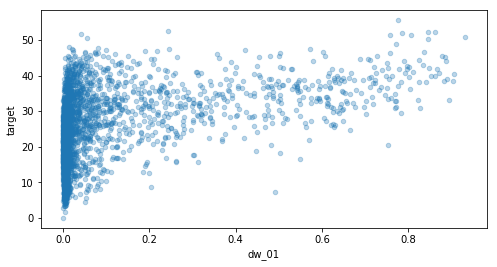

In [36]:
train.plot(x='dw_01', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage listing present school attendance

Indicates the percentage listing present school attendance of children living in the ward.

In [6]:
school_attendance = ['psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'target']
train[school_attendance].head()

,psa_00,psa_01,psa_02,psa_03,psa_04,target
0,0.260191,0.607898,0.000188,0.010018,0.121705,16.773757
1,0.290228,0.549788,0.000000,0.021336,0.138647,21.496661
2,0.186435,0.677005,0.000489,0.021315,0.114757,10.931425
3,0.281229,0.593281,0.000579,0.007249,0.117663,23.119257
4,0.196687,0.517578,0.000989,0.005148,0.279598,13.652252


In [7]:
train[school_attendance].corr()[['target']]

,target
psa_00,0.782472
psa_01,-0.707506
psa_02,-0.097613
psa_03,-0.301572
psa_04,0.203999
target,1.000000


We see that variable 'psa_00' has a good correlation with the target variable, so we will include this variable when building our model.

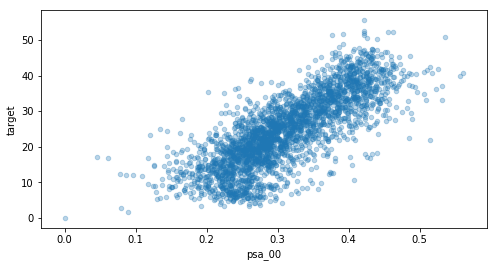

In [37]:
train.plot(x='psa_00', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage of households with satellite TV

Indicates the percentage of households with satellite TV in the ward.

In [8]:
train[['stv_00', 'stv_01', 'target']].corr()[['target']]

,target
stv_00,-0.664181
stv_01,0.664181
target,1.000000


We see that variable 'stv_01' has a good correlation with the target variable, so we will include this variable when building our model.

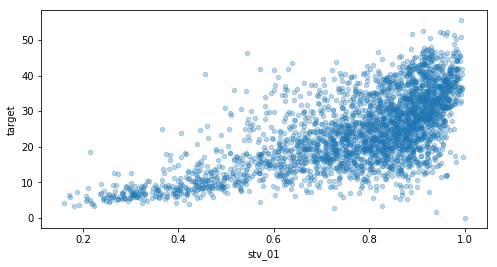

In [38]:
train.plot(x='stv_01', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage of households with a car

Indicates the percentage of households with a car in the ward.

In [9]:
train[['car_00', 'car_01', 'target']].corr()[['target']]

,target
car_00,-0.702831
car_01,0.702831
target,1.000000


We see that variable 'car_01' has a good correlation with the target variable, so we will include this variable when building our model.

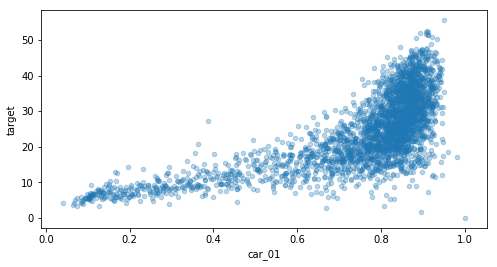

In [39]:
train.plot(x='car_01', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage listing landline ownership

Indicates the percentage listing landline ownership in the ward.

In [11]:
train[['lln_00', 'lln_01', 'target']].corr()[['target']]

,target
lln_00,-0.637835
lln_01,0.637835
target,1.000000


We see that variable 'lln_01' has a good correlation with the target variable, so we will include this variable when building our model.

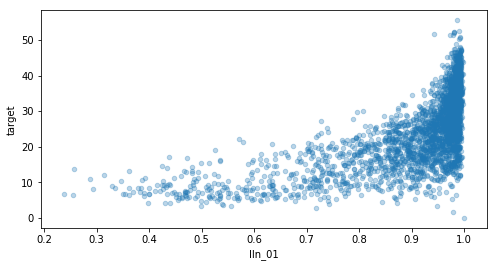

In [40]:
train.plot(x='lln_01', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage listing language

Indicates the percentage listing language in the ward.

In [12]:
language = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
            'lan_11', 'lan_12', 'lan_13', 'lan_14', 'target']
train[language].head()

,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,target
0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,16.773757
1,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,21.496661
2,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,10.931425
3,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,23.119257
4,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,13.652252


In [14]:
train[language].corr()[['target']]

,target
lan_00,-0.507942
lan_01,-0.438704
lan_02,-0.020163
lan_03,-0.142685
lan_04,0.232266
lan_05,0.275263
lan_06,-0.038563
lan_07,-0.046968
lan_08,-0.003930
lan_09,0.066230


We see that variable 'lan_05' has a somewhat ok correlation with the target variable, so we will include this variable when building our model.

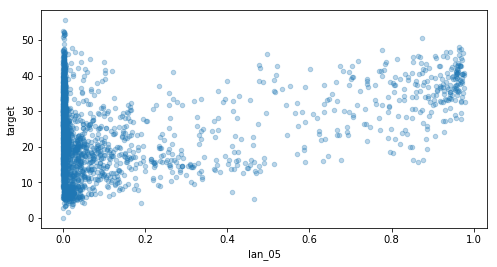

In [42]:
train.plot(x='lan_05', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage in population group

Indicates the percentage of population group in the ward.

In [15]:
population = ['pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'target']
train[population].head()

,pg_00,pg_01,pg_02,pg_03,pg_04,target
0,0.357455,0.563166,0.004260,0.072996,0.002123,16.773757
1,0.698428,0.278006,0.003695,0.015835,0.004036,21.496661
2,0.672452,0.154225,0.002181,0.167494,0.003649,10.931425
3,0.728014,0.263831,0.001806,0.000956,0.005393,23.119257
4,0.753491,0.129654,0.004523,0.106953,0.005380,13.652252


In [16]:
train[population].corr()[['target']]

,target
pg_00,0.613346
pg_01,-0.232792
pg_02,-0.224005
pg_03,-0.583908
pg_04,-0.213812
target,1.000000


We see that variable 'pg_00' has a somewhat good correlation with the target variable, so we will include this variable when building our model.

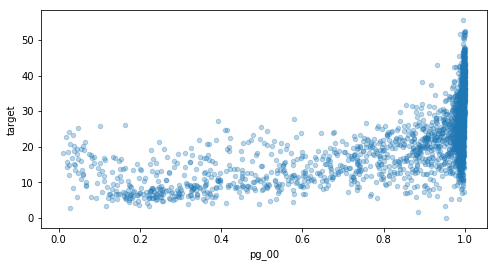

In [44]:
train.plot(x='pg_00', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Percentage using electricity for lighting 

Indicates the percentage using electricity for lighting in the ward.

In [18]:
train[['lgt_00', 'target']].corr()[['target']]

,target
lgt_00,-0.260286
target,1.000000


We see that variable 'lgt_00' does not have a good correlation with the target variable, so we won't include this variable when building our model.

## Percentage with piped water access

Indicates the percentage with piped water access in the ward.

In [19]:
water_access = ['pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07', 'pw_08', 'target']
train[water_access].head()

,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,target
0,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,16.773757
1,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,21.496661
2,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,10.931425
3,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,23.119257
4,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,13.652252


In [20]:
train[water_access].corr()[['target']]

,target
pw_00,-0.754536
pw_01,0.113646
pw_02,0.442441
pw_03,0.440941
pw_04,0.389467
pw_05,0.349653
pw_06,0.470676
pw_07,NaN
pw_08,NaN
target,1.000000


We see that variable 'pw_06' has a somewhat good correlation with the target variable, so we will include this variable when building our model.

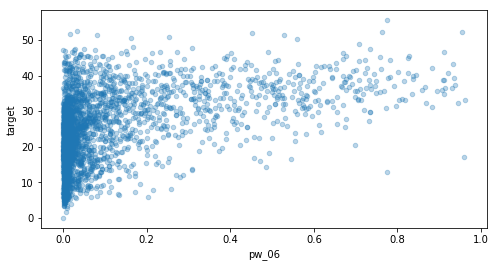

In [47]:
train.plot(x='pw_06', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

## Latitude, longitude, total households, total individuals, night lights value

Looking at the latitude, longitude, total households, total individuals, and night lights value in the ward.

In [27]:
train[['lat', 'lon', 'total_households', 'total_individuals', 'NL', 'target']].corr()[['target']]

,target
lat,0.120381
lon,0.347088
total_households,-0.374833
total_individuals,-0.293827
NL,-0.514398
target,1.000000


We see that variable 'lon' has a somewhat ok correlation with the target variable, so we will include this variable when building our model.

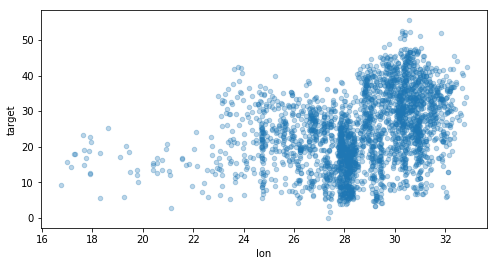

In [48]:
train.plot(x='lon', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

# Feature engineering

In [49]:
train['household_size'] = train['total_individuals'] / train['total_households']

In [50]:
train[['household_size', 'target']].corr()[['target']]

,target
household_size,-0.039266
target,1.000000


Looking at the new created variable 'household_size', we see that it does not have a good correlation with the target variable so we won't include this variable when building our model.

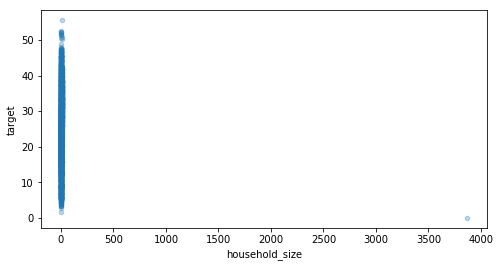

In [51]:
train.plot(x='household_size', y='target', kind='scatter', alpha=0.3, figsize=(8,4))
plt.show()

# Modelling

In [56]:
final_fields = [ 'dw_01', 'psa_00',  'stv_01', 'car_01', 'lln_01', 'lan_05', 'pg_00', 'pw_06', 'lon']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [57]:
X = train[final_fields]
y = train[['target']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Linear Regression Model

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
y_pred = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.275130825500428

### Random Forest Regressor Model

In [62]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

C:\Users\jamie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
y_pred = rfr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.7661678914916887

# Preparing test data

In [64]:
test = pd.read_csv('Test.csv')

In [65]:
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [66]:
final_test = test[final_fields]

In [69]:
y_pred_lr = lr.predict(final_test)

In [70]:
y_pred_rfr = rfr.predict(final_test)

# Submission

In [67]:
submission_lr = pd.DataFrame(columns=['ward', 'target'])
submission_rfr = pd.DataFrame(columns=['ward', 'target'])

In [71]:
submission_lr['ward'] = test['ward']
submission_lr['target'] = y_pred_lr
submission_lr.head()

,ward,target
0,21001001: Ward 1,21.811730
1,21001002: Ward 2,10.805571
2,21001003: Ward 3,24.688290
3,21001004: Ward 4,19.549867
4,21001005: Ward 5,24.716254


In [72]:
submission_rfr['ward'] = test['ward']
submission_rfr['target'] = y_pred_rfr
submission_rfr.head()

,ward,target
0,21001001: Ward 1,20.148271
1,21001002: Ward 2,13.040693
2,21001003: Ward 3,21.725967
3,21001004: Ward 4,17.416490
4,21001005: Ward 5,19.940730


In [73]:
submission_lr.to_csv('submission_lr.csv', index=False)
submission_rfr.to_csv('submission_rfr.csv', index=False)